In [12]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [11]:
import numpy as np
class DummyLinearRegression:
    def __init__(self,lr=0.01):
        self.learnning_rate = lr

    def y_pred(self,slopes,bias,x):
        return np.reshape(x.dot(slopes), (-1,1)) + bias
    
    def calc_gradients(self,x,y,slopes,bias):
        diff = y - self.y_pred(slopes,bias,x)
        slopes_grad = np.mean(diff * x,axis=0)
        bias_grad = np.mean(diff)
        cost_function = np.mean(np.square(diff))
        return slopes_grad,bias_grad,cost_function

    def fit(self,x,y):
        self.comparisions = {'slopes':[],
                             'bias':[],
                             'loss':[]}
        difference = 1
        old_cost_function = float('-inf')
        
        slopes = np.random.rand(np.shape(x)[1])
        bias = np.random.rand(1)
        
        while difference > 1e-16:
            slopes_grad,bias_grad,cost_function = self.calc_gradients(x, y,slopes,bias)
            difference = np.absolute(cost_function-old_cost_function)
            slopes,bias = slopes + self.learnning_rate * slopes_grad, bias + self.learnning_rate * bias_grad
            old_cost_function = cost_function
            
            self.comparisions['slopes'].append(slopes)
            self.comparisions['bias'].append(bias)
            self.comparisions['loss'].append(cost_function)
        
        self.model_params = slopes,bias  
        return cost_function
    def predict(self,x):
        try:
            slopes,bias = self.model_params
            return x.dot(slopes)+bias
        except Exception as e:
            raise "Please fit with data first"

In [3]:
df = pd.read_csv("house_prices_train.csv")

In [4]:
lr = DummyLinearRegression(lr=0.1)

In [5]:
lr.fit(df[['BedroomAbvGr','HalfBath']].to_numpy(),df[['SalePrice']].to_numpy())

np.float64(5726063309.0188265)

In [6]:
lr.model_params

(array([10657.73260928, 40962.89389619]), array([134687.72181836]))

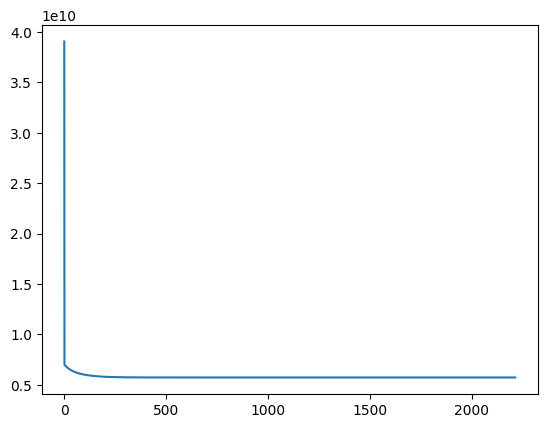

In [7]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(lr.comparisions['loss'])),lr.comparisions['loss'])

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr1 = LinearRegression(n_jobs=-1)
lr1.fit(df[['BedroomAbvGr','HalfBath']].to_numpy(),df[['SalePrice']].to_numpy())

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [43]:
lr1.intercept_

array([134687.75711672])

In [44]:
lr1.coef_

array([[10657.72101043, 40962.8947781 ]])

In [9]:
df = pd.read_csv("tvmarketing.csv")

In [13]:
lr=DummyLinearRegression(lr=0.01)
lr.fit(df[['TV']].to_numpy(),df[['Sales']].to_numpy())

/home/kamal/miniconda3/lib/python3.13/site-packages/numpy/_core/_methods.py:135: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_58570/2109201241.py:13: RuntimeWarning: overflow encountered in square
  cost_function = np.mean(np.square(diff))
/tmp/ipykernel_58570/2109201241.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  difference = np.absolute(cost_function-old_cost_function)


np.float64(inf)

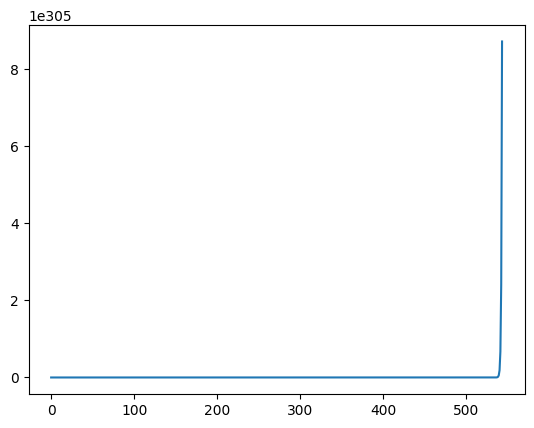

In [51]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(lr.comparisions['loss'])),lr.comparisions['loss'])

In [53]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [54]:
lr1 = LinearRegression(n_jobs=-1)
lr1.fit(df[['TV']].to_numpy(),df[['Sales']].to_numpy())


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [55]:
lr1.coef_

array([[0.04753664]])

In [56]:
lr1.intercept_

array([7.03259355])

In [57]:
lr.model_params

(array([3.73757271e+151]), array([1.89803352e+149]))

In [59]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amjadzhour/car-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 19.4k/19.4k [00:00<00:00, 212kB/s]

Extracting files...
Path to dataset files: /home/kamal/.cache/kagglehub/datasets/amjadzhour/car-price-prediction/versions/1


In [62]:
df=pd.read_csv(path+'/Car_Price_Prediction.csv')

In [63]:
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


In [77]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(sparse_output=False)
new_df = oe.fit_transform(df[['Make','Model','Year','Fuel Type','Transmission']]) 

In [78]:
oe.get_feature_names_out()

array(['Make_Audi', 'Make_BMW', 'Make_Ford', 'Make_Honda', 'Make_Toyota',
       'Model_Model A', 'Model_Model B', 'Model_Model C', 'Model_Model D',
       'Model_Model E', 'Year_2000', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Fuel Type_Diesel', 'Fuel Type_Electric', 'Fuel Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual'], dtype=object)

In [79]:
new_df = pd.concat((df.drop(['Make','Model','Year','Fuel Type','Transmission','Price'],axis=1),pd.DataFrame(new_df,columns=oe.get_feature_names_out())),axis=1)

In [81]:
new_df.head(3)

,Engine Size,Mileage,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota,Model_Model A,Model_Model B,Model_Model C,...,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,3.9,74176,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.7,94799,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,4.1,98385,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [85]:
lr = DummyLinearRegression(0.1)
lr.fit(new_df.to_numpy(),df[['Price']].to_numpy())

/tmp/ipykernel_48603/1598138352.py:13: RuntimeWarning:

overflow encountered in square

/tmp/ipykernel_48603/1598138352.py:28: RuntimeWarning:

invalid value encountered in scalar subtract



np.float64(inf)

In [86]:
lr.model_params

(array([-1.64216163e+168, -7.86137874e+172, -1.29418762e+167,
        -1.03434821e+167, -1.29972488e+167, -1.16666101e+167,
        -1.09301097e+167, -1.16381593e+167, -1.26135004e+167,
        -1.21676943e+167, -1.24670328e+167, -9.99294006e+166,
        -3.43649585e+166, -1.98802454e+166, -2.31180711e+166,
        -3.18755153e+166, -1.86841757e+166, -1.97530574e+166,
        -2.10393854e+166, -1.88806612e+166, -3.29043597e+166,
        -2.97640376e+166, -3.23862482e+166, -2.31663535e+166,
        -2.94308833e+166, -2.38844581e+166, -3.74367947e+166,
        -3.03930531e+166, -2.92547647e+166, -2.92766342e+166,
        -2.58829660e+166, -2.57108579e+166, -2.30571154e+166,
        -2.86486727e+166, -2.05904461e+167, -1.96175875e+167,
        -1.86712933e+167, -2.77476095e+167, -3.11317174e+167]),
 array([-5.88793269e+167]))

In [87]:
lr1 = LinearRegression()
lr1.fit(new_df.to_numpy(),df[['Price']].to_numpy())

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
lr1.coef_,lr1.intercept_

(array([[ 1.93777416e+03, -4.90980426e-02, -3.44512626e+00,
          1.00319882e+02,  6.02769322e+01, -1.33073939e+02,
         -2.40777490e+01, -5.59581994e+01,  2.66693104e+01,
         -7.29469463e-01,  2.33457231e+02, -2.03438873e+02,
         -5.51689725e+03, -4.94200923e+03, -4.43279676e+03,
         -3.06846153e+03, -3.20376675e+03, -2.82806758e+03,
         -2.33630174e+03, -2.43121200e+03, -1.07340089e+03,
         -9.75806157e+02, -3.09955905e+02, -1.56378424e+02,
          1.00832860e+03,  1.14459906e+03,  1.73915780e+03,
          2.45780633e+03,  2.98607151e+03,  3.15210780e+03,
          3.79507800e+03,  4.45996280e+03,  4.87466155e+03,
          5.65728077e+03, -2.80423332e+01,  3.88554430e+01,
         -1.08131098e+01,  4.36606302e+00, -4.36606302e+00]]),
 array([24369.65230676]))